## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import make_regression

# Set random seed for reproducibility
np.random.seed(42)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 1. Generate Synthetic Dataset

We'll create a dataset with:
- 200 samples
- 20 features (10 informative, 5 redundant)
- This will demonstrate Lasso's feature selection capability

In [4]:
print("=" * 70)
print("GENERATING SYNTHETIC DATASET")
print("=" * 70)

# Create a dataset with multiple features
X, y = make_regression(
    n_samples=200,           # Number of samples
    n_features=20,           # Total number of features
    n_informative=10,        # Number of useful features
    noise=20,                # Standard deviation of noise
    random_state=42
)

# Create feature names
feature_names = [f'Feature_{i+1}' for i in range(X.shape[1])]

print(f"Dataset shape: {X.shape}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Target variable shape: {y.shape}")

GENERATING SYNTHETIC DATASET
Dataset shape: (200, 20)
Number of samples: 200
Number of features: 20
Target variable shape: (200,)


## 2. Split the Data into Training and Test Sets

In [5]:
print("=" * 70)
print("SPLITTING DATA INTO TRAIN AND TEST SETS")
print("=" * 70)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing
    random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

SPLITTING DATA INTO TRAIN AND TEST SETS
Training set size: 160 samples
Test set size: 40 samples


## 3. Feature Scaling (Standardization)

⚠️ **Important:** Lasso is sensitive to feature scales, so standardization is crucial!

In [6]:
print("=" * 70)
print("FEATURE SCALING (STANDARDIZATION)")
print("=" * 70)
print("Lasso is sensitive to feature scales, so standardization is important!")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Features have been standardized (mean=0, std=1)")

FEATURE SCALING (STANDARDIZATION)
Lasso is sensitive to feature scales, so standardization is important!

✓ Features have been standardized (mean=0, std=1)


## 4. Lasso Regression with Fixed Alpha

In [7]:
print("=" * 70)
print("LASSO REGRESSION WITH FIXED ALPHA")
print("=" * 70)

# Create and train Lasso model
alpha_value = 1.0
lasso = Lasso(
    alpha=alpha_value,      # Regularization strength
    max_iter=10000,         # Maximum iterations for convergence
    random_state=42
)

lasso.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Alpha (Regularization Parameter): {alpha_value}")
print(f"\nTraining Metrics:")
print(f"  MSE: {train_mse:.4f}")
print(f"  RMSE: {np.sqrt(train_mse):.4f}")
print(f"  MAE: {train_mae:.4f}")
print(f"  R² Score: {train_r2:.4f}")

print(f"\nTest Metrics:")
print(f"  MSE: {test_mse:.4f}")
print(f"  RMSE: {np.sqrt(test_mse):.4f}")
print(f"  MAE: {test_mae:.4f}")
print(f"  R² Score: {test_r2:.4f}")

LASSO REGRESSION WITH FIXED ALPHA
Alpha (Regularization Parameter): 1.0

Training Metrics:
  MSE: 386.9350
  RMSE: 19.6707
  MAE: 15.4889
  R² Score: 0.9846

Test Metrics:
  MSE: 415.3070
  RMSE: 20.3791
  MAE: 14.5658
  R² Score: 0.9825


## 5. Feature Selection Analysis

One of Lasso's key advantages is automatic feature selection!

In [8]:
print("=" * 70)
print("FEATURE SELECTION WITH LASSO")
print("=" * 70)

# Get coefficients
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso.coef_
})
coefficients['Abs_Coefficient'] = np.abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

print("\nFeature Coefficients (sorted by absolute value):")
print(coefficients.to_string(index=False))

# Count non-zero coefficients (selected features)
non_zero_features = np.sum(lasso.coef_ != 0)
zero_features = np.sum(lasso.coef_ == 0)

print(f"\n📊 Feature Selection Results:")
print(f"  Non-zero coefficients (selected features): {non_zero_features}")
print(f"  Zero coefficients (eliminated features): {zero_features}")
print(f"  Intercept: {lasso.intercept_:.4f}")

FEATURE SELECTION WITH LASSO

Feature Coefficients (sorted by absolute value):
   Feature  Coefficient  Abs_Coefficient
Feature_14    96.209325        96.209325
 Feature_9    61.828054        61.828054
 Feature_8    49.754066        49.754066
Feature_15    48.261602        48.261602
 Feature_5    45.400654        45.400654
Feature_10    40.081587        40.081587
 Feature_4    23.401367        23.401367
Feature_11    10.150446        10.150446
Feature_19     7.593602         7.593602
 Feature_6     7.431065         7.431065
Feature_12    -1.097409         1.097409
Feature_18     0.517493         0.517493
 Feature_7    -0.495442         0.495442
Feature_13     0.324317         0.324317
 Feature_2    -0.308902         0.308902
Feature_20     0.157594         0.157594
 Feature_3    -0.117552         0.117552
 Feature_1    -0.000000         0.000000
Feature_16    -0.000000         0.000000
Feature_17    -0.000000         0.000000

📊 Feature Selection Results:
  Non-zero coefficients (selec

## 6. Cross-Validated Lasso (LassoCV)

Let's find the optimal alpha using cross-validation!

In [9]:
print("=" * 70)
print("LASSO WITH CROSS-VALIDATION (LassoCV)")
print("=" * 70)
print("Finding optimal alpha using cross-validation...")

# Define range of alpha values to try
alphas = np.logspace(-4, 4, 100)  # 100 values from 0.0001 to 10000

# LassoCV automatically finds the best alpha
lasso_cv = LassoCV(
    alphas=alphas,
    cv=5,                   # 5-fold cross-validation
    max_iter=10000,
    random_state=42
)

lasso_cv.fit(X_train_scaled, y_train)

# Make predictions with optimal model
y_train_pred_cv = lasso_cv.predict(X_train_scaled)
y_test_pred_cv = lasso_cv.predict(X_test_scaled)

# Calculate metrics
test_mse_cv = mean_squared_error(y_test, y_test_pred_cv)
test_r2_cv = r2_score(y_test, y_test_pred_cv)

print(f"\nOptimal Alpha (from CV): {lasso_cv.alpha_:.4f}")
print(f"\nTest Metrics (with optimal alpha):")
print(f"  MSE: {test_mse_cv:.4f}")
print(f"  RMSE: {np.sqrt(test_mse_cv):.4f}")
print(f"  R² Score: {test_r2_cv:.4f}")

# Count features selected with optimal alpha
non_zero_cv = np.sum(lasso_cv.coef_ != 0)
print(f"\nFeatures selected with optimal alpha: {non_zero_cv}")

LASSO WITH CROSS-VALIDATION (LassoCV)
Finding optimal alpha using cross-validation...

Optimal Alpha (from CV): 0.7565

Test Metrics (with optimal alpha):
  MSE: 414.6003
  RMSE: 20.3617
  R² Score: 0.9825

Features selected with optimal alpha: 17


## 7. Compare Different Alpha Values

Let's see how different alpha values affect performance and feature selection.

In [10]:
print("=" * 70)
print("COMPARING DIFFERENT ALPHA VALUES")
print("=" * 70)

alpha_values = [0.01, 0.1, 1.0, 10.0, 100.0]
results = []

for alpha in alpha_values:
    model = Lasso(alpha=alpha, max_iter=10000, random_state=42)
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n_features = np.sum(model.coef_ != 0)
    
    results.append({
        'Alpha': alpha,
        'Test_MSE': mse,
        'Test_R2': r2,
        'Features_Selected': n_features
    })

results_df = pd.DataFrame(results)
print("\nPerformance across different alpha values:")
print(results_df.to_string(index=False))

COMPARING DIFFERENT ALPHA VALUES

Performance across different alpha values:
 Alpha     Test_MSE  Test_R2  Features_Selected
  0.01   430.683862 0.981871                 20
  0.10   427.504851 0.982004                 19
  1.00   415.307038 0.982518                 17
 10.00  1242.250149 0.947708                  7
100.00 21215.394381 0.106949                  1


## 8. Visualizations

Let's create comprehensive visualizations to understand Lasso's behavior.

GENERATING VISUALIZATIONS
✓ Visualizations generated successfully!


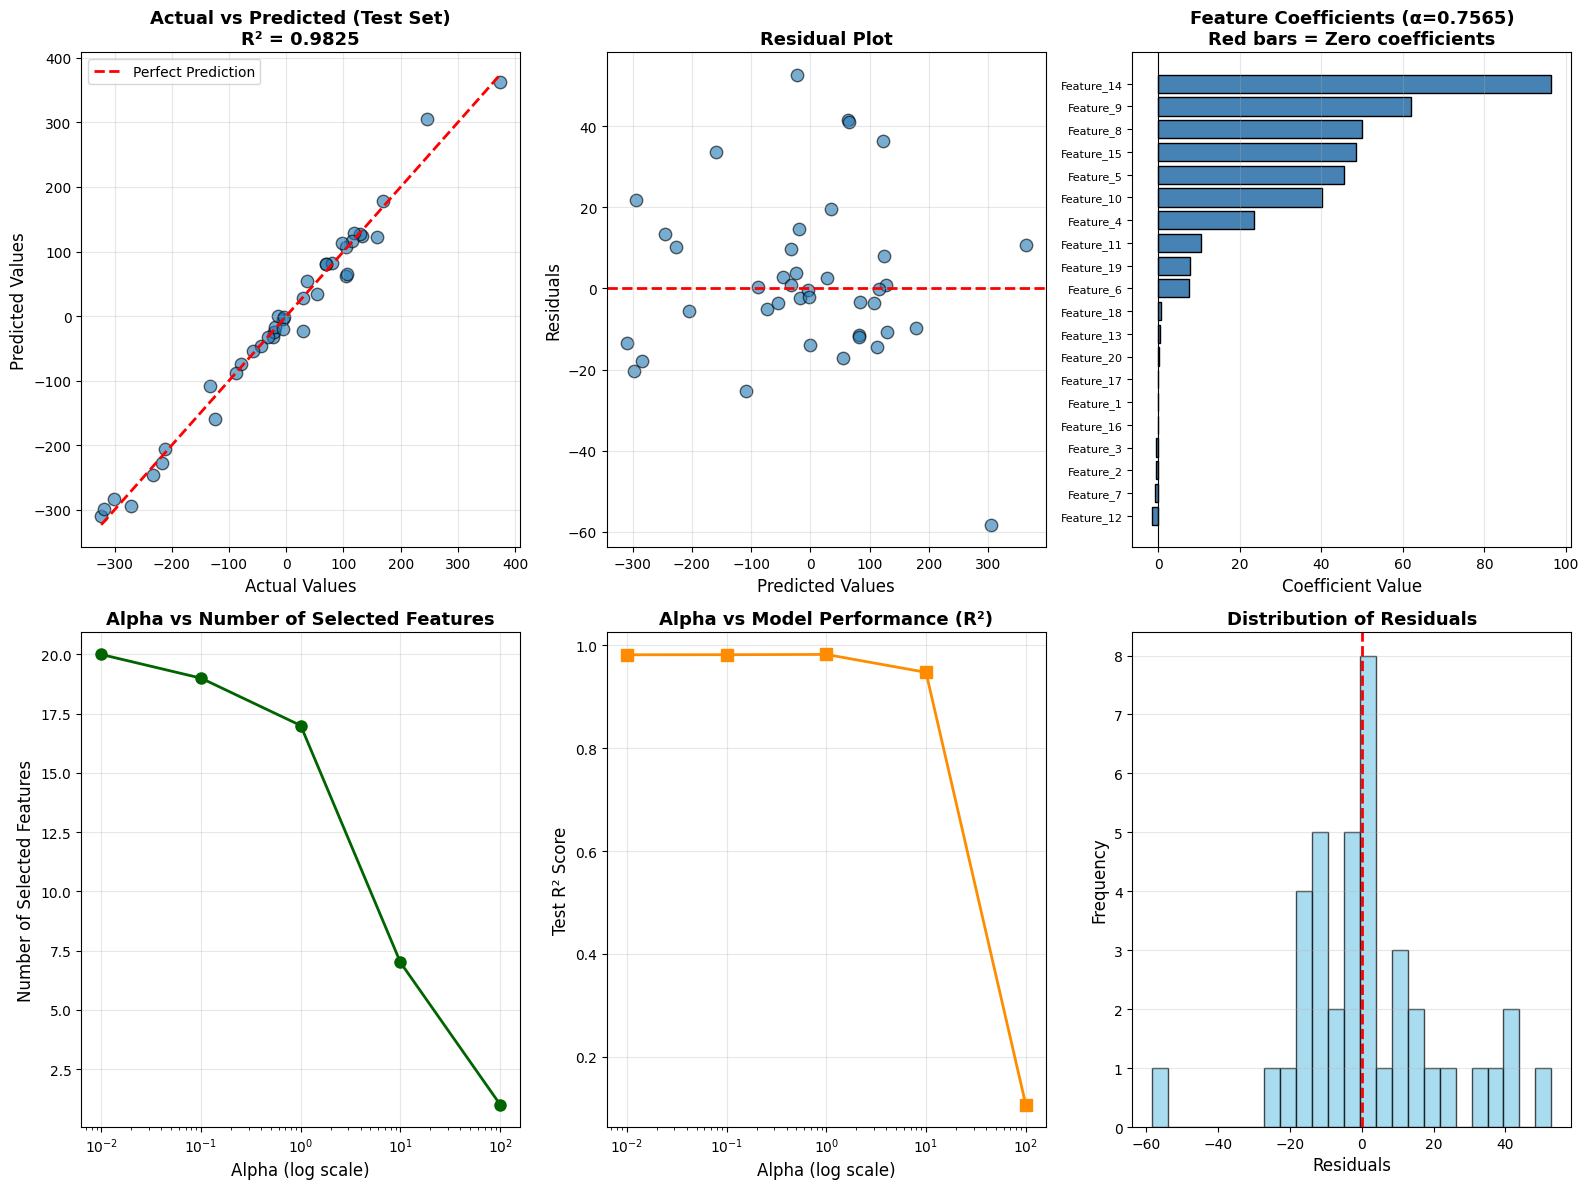

In [11]:
print("=" * 70)
print("GENERATING VISUALIZATIONS")
print("=" * 70)

# Create a figure with multiple subplots
fig = plt.figure(figsize=(16, 12))

# 1. Actual vs Predicted (Test Set)
ax1 = plt.subplot(2, 3, 1)
plt.scatter(y_test, y_test_pred_cv, alpha=0.6, edgecolors='k', s=80)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title(f'Actual vs Predicted (Test Set)\nR² = {test_r2_cv:.4f}', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Residuals Plot
ax2 = plt.subplot(2, 3, 2)
residuals = y_test - y_test_pred_cv
plt.scatter(y_test_pred_cv, residuals, alpha=0.6, edgecolors='k', s=80)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residual Plot', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)

# 3. Feature Coefficients
ax3 = plt.subplot(2, 3, 3)
coef_cv = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_cv.coef_
}).sort_values('Coefficient')

colors = ['red' if c == 0 else 'steelblue' for c in coef_cv['Coefficient']]
plt.barh(range(len(coef_cv)), coef_cv['Coefficient'], color=colors, edgecolor='black')
plt.yticks(range(len(coef_cv)), coef_cv['Feature'], fontsize=8)
plt.xlabel('Coefficient Value', fontsize=12)
plt.title(f'Feature Coefficients (α={lasso_cv.alpha_:.4f})\nRed bars = Zero coefficients', 
          fontsize=13, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')

# 4. Alpha vs Number of Features
ax4 = plt.subplot(2, 3, 4)
plt.plot(results_df['Alpha'], results_df['Features_Selected'], 
         marker='o', linewidth=2, markersize=8, color='darkgreen')
plt.xscale('log')
plt.xlabel('Alpha (log scale)', fontsize=12)
plt.ylabel('Number of Selected Features', fontsize=12)
plt.title('Alpha vs Number of Selected Features', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)

# 5. Alpha vs Test R²
ax5 = plt.subplot(2, 3, 5)
plt.plot(results_df['Alpha'], results_df['Test_R2'], 
         marker='s', linewidth=2, markersize=8, color='darkorange')
plt.xscale('log')
plt.xlabel('Alpha (log scale)', fontsize=12)
plt.ylabel('Test R² Score', fontsize=12)
plt.title('Alpha vs Model Performance (R²)', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)

# 6. Distribution of Residuals
ax6 = plt.subplot(2, 3, 6)
plt.hist(residuals, bins=25, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Residuals', fontsize=13, fontweight='bold')
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
print("✓ Visualizations generated successfully!")
plt.show()

## 9. Key Insights About Lasso Regression

In [12]:
print("\n" + "=" * 70)
print("KEY INSIGHTS ABOUT LASSO REGRESSION")
print("=" * 70)

print("""
📌 What is Lasso Regression?
   - Lasso adds L1 penalty (sum of absolute values of coefficients) to linear regression
   - Cost Function: MSE + α * Σ|θⱼ|
   - Performs both regularization AND feature selection

📌 Key Characteristics:
   ✓ Shrinks coefficients toward zero
   ✓ Can set coefficients EXACTLY to zero (unlike Ridge)
   ✓ Performs automatic feature selection
   ✓ Useful when you have many features and want a sparse model

📌 Alpha Parameter (Regularization Strength):
   - Alpha = 0: Equivalent to ordinary linear regression
   - Small Alpha: Light regularization, keeps more features
   - Large Alpha: Strong regularization, eliminates more features
   - Too large: May eliminate too many features (underfitting)

📌 When to Use Lasso:
   ✓ When you have many features and want to identify the most important ones
   ✓ When you suspect many features are irrelevant
   ✓ When you want a simpler, more interpretable model
   ✓ When dealing with multicollinearity

📌 Lasso vs Ridge:
   - Lasso (L1): Sets coefficients to exactly zero → feature selection
   - Ridge (L2): Shrinks coefficients but keeps all features
   - Elastic Net: Combines both L1 and L2 penalties

📌 Important Notes:
   ⚠ Always scale features before applying Lasso
   ⚠ Use cross-validation (LassoCV) to find optimal alpha
   ⚠ Results are sensitive to feature scaling
   ⚠ May arbitrarily select one feature from correlated groups
""")

print("=" * 70)
print("SCRIPT COMPLETED SUCCESSFULLY!")
print("=" * 70)


KEY INSIGHTS ABOUT LASSO REGRESSION

📌 What is Lasso Regression?
   - Lasso adds L1 penalty (sum of absolute values of coefficients) to linear regression
   - Cost Function: MSE + α * Σ|θⱼ|
   - Performs both regularization AND feature selection

📌 Key Characteristics:
   ✓ Shrinks coefficients toward zero
   ✓ Can set coefficients EXACTLY to zero (unlike Ridge)
   ✓ Performs automatic feature selection
   ✓ Useful when you have many features and want a sparse model

📌 Alpha Parameter (Regularization Strength):
   - Alpha = 0: Equivalent to ordinary linear regression
   - Small Alpha: Light regularization, keeps more features
   - Large Alpha: Strong regularization, eliminates more features
   - Too large: May eliminate too many features (underfitting)

📌 When to Use Lasso:
   ✓ When you have many features and want to identify the most important ones
   ✓ When you suspect many features are irrelevant
   ✓ When you want a simpler, more interpretable model
   ✓ When dealing with multico